Priority Round Robin Scheduling Algorithm (PREEMPTIVE)

Priority with Round Robin (PREEMPTIVE)

Process Order      Burst Time      Priority      Waiting Time     Turnaround Time
	 P4 		 7 		 1 		 0 		 7
	 P2 		 5 		 2 		 11 		 16
	 P3 		 8 		 2 		 12 		 20
	 P1 		 4 		 3 		 22 		 26
	 P5 		 3 		 3 		 24 		 27
1. Process Order: P4,P2,P3,P2,P3,P2,P3,P1,P5,P1,P5
1. Completion Order: 0,7,9,11,13,15,16,20,22,24,26,27
3. Processes with wait time: ('P4', 0),('P2', 7),('P3', 9),('P2', 11),('P3', 13),('P2', 15),('P3', 16),('P1', 20),('P5', 22),('P1', 24),('P5', 26)
4. Average Wait Time:  13.8
5. Average Turnaround Time:  19.2


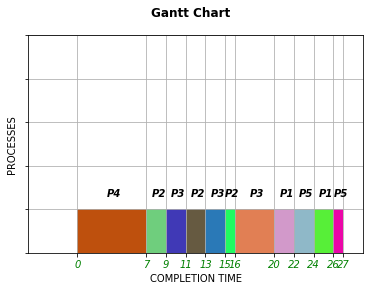

In [3]:
import json
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import random

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
def drawGantt(process_execution_order,completion_order,waiting_time, avg_waiting_time, turnaround_time, avg_turnaround_time):
    # Declaring a figure "gnt", # Setting Y-axis limits, X-axis limits, # Setting labels for x-axis and y-axis
    fig, gnt = plt.subplots()
    ax = plt.gca()
    
    plt.ylabel("Processes")
    plt.xlabel("X Label")
    
    gnt.set_xlim(-5, completion_order[-1]+2)
    gnt.set_ylim(0, 5)
    
    gnt.set_xlabel('COMPLETION TIME')
    gnt.set_ylabel('PROCESSES')
    
    ax.axes.yaxis.set_ticklabels([])
    ax.set_xticks(completion_order)
    ax.set_xticklabels(labels = completion_order, fontstyle='italic', color='green')
    
    # Setting graph attribute
    gnt.grid(True)
    
    #plt.box(False)
    no_of_colors=len(process_execution_order)
    colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])for j in range(no_of_colors)]

    # Declaring a bar in schedule
    i = 0
    while i < len(completion_order)-1:
        ax.text((completion_order[i]+(completion_order[i+1]-completion_order[i])/2)-0.5, 1.3, process_execution_order[i], 
                style='italic',weight='bold')
        gnt.broken_barh([(completion_order[i], completion_order[i+1]-completion_order[i])], (0, 1), facecolors =(colors[i]))
        i += 1
    merge = list(zip((process_execution_order), (completion_order)))
    
    print("1. Process Order: "+ str(",".join(str(item) for item in process_execution_order)))
    print("1. Completion Order: "+ str(",".join(str(item) for item in completion_order)))
    print("3. Processes with wait time: "+ str(",".join(str(item) for item in merge)))
    print("4. Average Wait Time: ", avg_waiting_time)
    print("5. Average Turnaround Time: ", avg_turnaround_time)
    fig.suptitle('Gantt Chart\n', fontweight ="bold")
    
    return(plt.savefig("prrgantt.png"))

def sortProcessOnPriority(burst_time, priority):
    sorted_priority = dict(sorted(priority.items(), key=lambda x: x[1], reverse=False))
    burst_time_order = []
    for process in sorted_priority:
        burst_time_order.append(burst_time[process])
    return sorted_priority, burst_time_order

def getBurstTime(value, burst_time):
    bt = []
    for i in value:
        bt.append(burst_time[i])
    return bt

def getRRWaitingTime(process_count,processes, burst_time , quantum,exittime):
    process_order = []
    remaining_btime = [0] * process_count
    waitingtime_rr = [0] * process_count
    for i in range(process_count):
        remaining_btime[i] = burst_time[i]
    t = 0
    while 1:
        done = True
        for i in range(process_count):
            if remaining_btime[i] > 0:
                process_order.append(processes[i])
                done = False
                if remaining_btime[i] > quantum:
                    t += quantum
                    exittime += quantum
                    startexistlist.append(exittime)
                    remaining_btime[i] -= quantum
                else:
                    if len(process_order)>2:
                        if process_order[-2]==process_order[-1]:
                            process_order.pop()
                            startexistlist.pop()

                    exittime += remaining_btime[i]
                    startexistlist.append(exittime)
                    t = t + remaining_btime[i]
                    waitingtime_rr[i] = current_time + t - burst_time[i]
                    remaining_btime[i] = 0
                    
        if (done == True):
            break
    return waitingtime_rr, process_order, startexistlist

def findAvg(items):
    sum = 0
    for item in range(len(items)):
        sum = sum + items[item]
    average = sum / len(items)
    return average

def display(sorted_priority, burst_time, waiting_time, avg_waiting_time, turnaround_time, avg_turnaround_time):
    print(color.BOLD + color.UNDERLINE + "Priority with Round Robin (PREEMPTIVE)\n"+ color.END)
    #print("Process\t", "Burst Time\t ", "Priority \t ", "Waiting Time\t ", "Turnaround Time")
    print(color.BOLD+"Process Order      Burst Time      Priority      Waiting Time     Turnaround Time"+color.END)

    index = 0
    for i in sorted_priority:
        print("\t", i, "\t\t", burst_time[i], "\t\t", sorted_priority[i], "\t\t", waiting_time[index], "\t\t",
              turnaround_time[index])
        index = index + 1

def main():
    global current_time,starttime,startexistlist 
    burst_time = {}
    priority = {}
    f = open('prr_process_information.json',)
    data = json.load(f)
    f.close()
    quantum = data['quantum']
    # store the burst time & priority into 2 different dictionaries.
    for i in data['process_information']:
        burst_time[i['process_id']] = i['burst_time']
        priority[i['process_id']]=i['priority']

    sorted_priority, burst_time_order = sortProcessOnPriority(burst_time, priority)

    # store the process list into priority dictionary.
    priorities = {}
    for process, priority in sorted_priority.items():
        if priority not in priorities:
            priorities[priority] = [process]
        else:
            priorities[priority].append(process)

    wait_time = []
    current_time = 0
    starttime = 0
    exittime = 0
    startexistlist = []
    process_execution_order = []
    completion_order = []
    startexistlist.append(starttime)
    
    for _ , processes in priorities.items():
        # check if there is only one process, this will be same as priority
        if len(processes) < 2:
            process_execution_order.append(processes[0])
            wait_time.append([current_time])
            current_time = current_time + burst_time[processes[0]]
            exittime += current_time
            startexistlist.append(exittime)
            
        else:
            burst_time_rr_part = getBurstTime(processes, burst_time)
            waitingtime_rr, process_order, startexistlist = getRRWaitingTime(len(processes), processes, 
                                                                             burst_time_rr_part, quantum,exittime)

            for time in startexistlist:
                completion_order.append(time)
            startexistlist.clear()
             
            for process in process_order:
                process_execution_order.append(process)
                
            wait_time.append(waitingtime_rr)
            rr_burst_time = 0
            for bt_time in burst_time_rr_part:
                rr_burst_time = rr_burst_time + bt_time
            exittime = exittime + rr_burst_time
                
            current_time = current_time + rr_burst_time

    final_waiting_time = [wt_time for sublist in wait_time for wt_time in sublist]
    final_turnaround_time = []
    for i in range(0, len(final_waiting_time)):
        final_turnaround_time.append(final_waiting_time[i] + burst_time_order[i])

    # Function call to display output
    display(sorted_priority, burst_time, final_waiting_time, findAvg(final_waiting_time), final_turnaround_time,
                findAvg(final_turnaround_time))

    #ganttchart
    prr_gantt  = drawGantt(process_execution_order,completion_order,final_waiting_time, findAvg(final_waiting_time), 
                           final_turnaround_time,findAvg(final_turnaround_time))

if __name__ == "__main__":
    main()